# Fecha de entrega: 27/08/2022 (corresponde a clase 20)

# Algoritmo de clasificación: Logistic regression

# Diccionario

**BTC_ind_mom_ET_fv** 

- Date: fecha en YYYY-MM-DD (object)
- Price: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- Open: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- High: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- Low: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- Vol.: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
- Percentage_diff: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
- Target: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
- ADX: valores del índice de movimiento direccional medio (float) (Variable numérica continua)
- ADX_MDI: valores del Corriente Menos Movimiento Direccional (MDI) (float) (Variable numérica continua)
- ADX_MDM: valores del Mínimo Actual Menos el Mínimo Anterior (-DM) (float) (Variable numérica continua)
- ADX_DX: valores del índice de movimiento direccional (DX) (float) (Variable numérica continua)
- ADX_PDI: valores del Corriente Plus Movimiento Direccional (PDM) (float) (Variable numérica continua)
- ADX_PDM: valores del Máximo Actual Menos el Máximo Anterior (+DM) (float) (Variable numérica continua)
- Aroon_Oscillator: valores del Oscilador Aroon (float) (Variable numérica continua)
- MACD: valores del MACD (float) (Variable numérica continua)
- MACDSIGNAL: valores de la señal de MACD (float) (Variable numérica continua)
- MACDHIST: valores del histograma del MACD (float) (Variable numérica continua)
- MOM: valores del indicador Momentum (float) (Variable numérica continua)
- ROC: valores de la tasa de cambio de una variable durante un período específico de tiempo (float) (Variable numérica continua)
- RSI: valores del índice de fuerza relativa (float) (Variable numérica continua)
- STOCHRSI_fastk: valores de la aplicación del método estocástico al indicador RSI (con variable d) (más lento) (float) (Variable numérica continua)
- ULTOSC: valores del indicador Ultimate Oscillator (float) (Variable numérica continua)
- WILLR: valores del indicador Williams %R (float) (Variable numérica continua)
- ADX_ET: valores categóricos de la aplicación de la estrategia ADX (comprar, vender, mantener posición) (object)
- ADXR_ET: valores categóricos de la aplicación de la estrategia ADXR (comprar, vender, mantener posición) (object)
- MACD_ET: valores categóricos de la aplicación de la estrategia MACD (comprar, vender, mantener posición) (object)
- ROC_ET: valores categóricos de la aplicación de la estrategia ROC (comprar, vender, mantener posición) (object)
- STOCHRSI_fastk_ET: valores categóricos de la aplicación de la estrategia STOCHRSI_fastk (comprar, vender, mantener posición) (object)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_ind_mom_ET_fv

In [3]:
# Se carga la base de datos de BTC_ind_mom_ET_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/1r970fI0CJdhcCX8rt9Ld1pfbw6DjxIiB/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_ind_mom_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_ind_mom_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,15.128694


# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_ind_mom_fv_df.shape

(4386, 31)

In [6]:
# Nombre de columnas
BTC_ind_mom_fv_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'ADX', 'ADX_MDI', 'ADX_MDM', 'ADX_DX', 'ADX_PDI', 'ADX_PDM',
       'Aroon_Oscillator', 'MACD', 'MACDSIGNAL', 'MACDHIST', 'MOM', 'ROC',
       'RSI', 'STOCHRSI_fastk', 'ULTOSC', 'WILLR', 'ADX_ET', 'ADXR_ET',
       'MACD_ET', 'ROC_ET', 'STOCHRSI_fastk_ET', 'Trend', 'Residuals'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_ind_mom_fv_df.dtypes

Date                  object
Price                float64
Open                 float64
High                 float64
Low                  float64
Vol.                 float64
Percentage_diff      float64
Target               float64
ADX                  float64
ADX_MDI              float64
ADX_MDM              float64
ADX_DX               float64
ADX_PDI              float64
ADX_PDM              float64
Aroon_Oscillator     float64
MACD                 float64
MACDSIGNAL           float64
MACDHIST             float64
MOM                  float64
ROC                  float64
RSI                  float64
STOCHRSI_fastk       float64
ULTOSC               float64
WILLR                float64
ADX_ET                object
ADXR_ET               object
MACD_ET               object
ROC_ET                object
STOCHRSI_fastk_ET     object
Trend                float64
Residuals            float64
dtype: object

In [8]:
# Columnas y cantidad de registros
BTC_ind_mom_fv_df.count()

Date                 4386
Price                4386
Open                 4386
High                 4386
Low                  4386
Vol.                 4386
Percentage_diff      4386
Target               4386
ADX                  4359
ADX_MDI              4372
ADX_MDM              4372
ADX_DX               4372
ADX_PDI              4372
ADX_PDM              4373
Aroon_Oscillator     4372
MACD                 4353
MACDSIGNAL           4353
MACDHIST             4353
MOM                  4376
ROC                  4376
RSI                  4376
STOCHRSI_fastk       4366
ULTOSC               4358
WILLR                4373
ADX_ET               4386
ADXR_ET              4386
MACD_ET              4386
ROC_ET               4386
STOCHRSI_fastk_ET    4386
Trend                4380
Residuals            4380
dtype: int64

In [9]:
# Valores NaN
BTC_ind_mom_fv_df.isnull().sum()

Date                  0
Price                 0
Open                  0
High                  0
Low                   0
Vol.                  0
Percentage_diff       0
Target                0
ADX                  27
ADX_MDI              14
ADX_MDM              14
ADX_DX               14
ADX_PDI              14
ADX_PDM              13
Aroon_Oscillator     14
MACD                 33
MACDSIGNAL           33
MACDHIST             33
MOM                  10
ROC                  10
RSI                  10
STOCHRSI_fastk       20
ULTOSC               28
WILLR                13
ADX_ET                0
ADXR_ET               0
MACD_ET               0
ROC_ET                0
STOCHRSI_fastk_ET     0
Trend                 6
Residuals             6
dtype: int64

In [10]:
BTC_ind_mom_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,15.128694


Observaciones:

Se observaron varios registros NaN en "BTC_ind_mom_ET_fv.csv". 

Esto implica la necesidad de tomar una decisión con respecto a este tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En las variables [Trend] y [Residuals], 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2. Si se considera eliminar los 33 registros NaN (variable -> MACD) se estaría solamente eliminando un (33*100/4386 =) 0.75 % de los datos. 

Se eliminarán los valores NaN dado que los modelos no los toleran y no impactan en el marco general del proyecto (ver razones aducidas arriba). 

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [11]:
# Se crea una copia de BTC_ind_mom_fv_df con nombre BTC_ind_mom y se la reindexa con la variable [Date] como nuevo índice
BTC_ind_mom = BTC_ind_mom_fv_df.set_index("Date")

In [12]:
BTC_ind_mom.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,Trend,Residuals
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,27.268083,24.194644,24.194644,6.885001,21.077646,3443.366972,35.714286,-636.592931,-960.502376,323.909445,648.8,0.031555,54.341002,100.000000,55.402532,-34.498468,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,21370.371429,-160.287691
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,25.710035,22.840734,22.840734,5.455418,20.477541,3290.512188,35.714286,-577.232483,-883.848398,306.615914,-852.2,-0.039385,49.615550,59.412565,52.658819,-47.925083,Mantener_posicion,Mantener_posicion,Mantener_posicion,Vender,Vender,21784.528571,-994.949467
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,24.545625,20.207578,20.207578,9.408284,24.404841,4115.975603,35.714286,-385.327489,-784.144216,398.816727,914.6,0.042321,63.915158,100.000000,61.793596,-5.012325,Comprar,Mantener_posicion,Mantener_posicion,Comprar,Comprar,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,24.304487,17.742843,17.742843,21.169702,27.272446,4864.377346,42.857143,-160.032949,-659.321963,499.289013,1822.7,0.084433,68.899442,100.000000,68.346203,-7.208573,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,0.0,24.080574,17.259314,17.259314,21.169702,26.529215,4516.921821,42.857143,-2.524886,-527.962547,525.437661,2301.7,0.110407,65.912930,87.564957,64.588452,-12.631098,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN


Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [13]:
# Se genera un back up
BTC_ind_mom_2 = BTC_ind_mom.copy()

In [14]:
# Se realiza el shift 
BTC_ind_mom_2 ["Target"] = BTC_ind_mom ["Target"].shift(-1)

In [15]:
BTC_ind_mom_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,Trend,Residuals
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,27.268083,24.194644,24.194644,6.885001,21.077646,3443.366972,35.714286,-636.592931,-960.502376,323.909445,648.8,0.031555,54.341002,100.000000,55.402532,-34.498468,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,21370.371429,-160.287691
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,25.710035,22.840734,22.840734,5.455418,20.477541,3290.512188,35.714286,-577.232483,-883.848398,306.615914,-852.2,-0.039385,49.615550,59.412565,52.658819,-47.925083,Mantener_posicion,Mantener_posicion,Mantener_posicion,Vender,Vender,21784.528571,-994.949467
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,24.545625,20.207578,20.207578,9.408284,24.404841,4115.975603,35.714286,-385.327489,-784.144216,398.816727,914.6,0.042321,63.915158,100.000000,61.793596,-5.012325,Comprar,Mantener_posicion,Mantener_posicion,Comprar,Comprar,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,0.0,24.304487,17.742843,17.742843,21.169702,27.272446,4864.377346,42.857143,-160.032949,-659.321963,499.289013,1822.7,0.084433,68.899442,100.000000,68.346203,-7.208573,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,NaN,24.080574,17.259314,17.259314,21.169702,26.529215,4516.921821,42.857143,-2.524886,-527.962547,525.437661,2301.7,0.110407,65.912930,87.564957,64.588452,-12.631098,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN


Se convierten las variables categóricas ([ADX_ET], [ADXR_ET], [MACD_ET], [ROC_ET], [STOCHRSI_fastk_ET]) en variables dummies y se agregan a BTC_ind_mom_2

In [16]:
Variables = ["ADX_ET", "ADXR_ET", "MACD_ET", "ROC_ET", "STOCHRSI_fastk_ET"]

for var in Variables:
    dummies = pd.get_dummies(BTC_ind_mom_2 [var])
    dummies = dummies.rename(columns={"Comprar":"Comprar_"+var+"", "Mantener_posicion":"Mantener_posicion_"+var+"", "Vender":"Vender_"+var+""})
    BTC_ind_mom_2 = pd.concat([BTC_ind_mom_2, dummies], axis = 1)

In [17]:
BTC_ind_mom_2.head()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADX,ADX_MDI,ADX_MDM,ADX_DX,ADX_PDI,ADX_PDM,Aroon_Oscillator,MACD,MACDSIGNAL,MACDHIST,MOM,ROC,RSI,STOCHRSI_fastk,ULTOSC,WILLR,ADX_ET,ADXR_ET,MACD_ET,ROC_ET,STOCHRSI_fastk_ET,Trend,Residuals,Comprar_ADX_ET,Mantener_posicion_ADX_ET,Vender_ADX_ET,Comprar_ADXR_ET,Mantener_posicion_ADXR_ET,Vender_ADXR_ET,Comprar_MACD_ET,Mantener_posicion_MACD_ET,Vender_MACD_ET,Comprar_ROC_ET,Mantener_posicion_ROC_ET,Vender_ROC_ET,Comprar_STOCHRSI_fastk_ET,Mantener_posicion_STOCHRSI_fastk_ET,Vender_STOCHRSI_fastk_ET
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-19.575231,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,15.128694,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


Se eliminan las variables categóricas del BTC_ind_mom_2

In [18]:
BTC_ind_mom_2 = BTC_ind_mom_2.drop(["ADX_ET", "ADXR_ET", "MACD_ET", "ROC_ET", "STOCHRSI_fastk_ET"], axis=1)

In [19]:
BTC_ind_mom_2.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff', 'Target',
       'ADX', 'ADX_MDI', 'ADX_MDM', 'ADX_DX', 'ADX_PDI', 'ADX_PDM',
       'Aroon_Oscillator', 'MACD', 'MACDSIGNAL', 'MACDHIST', 'MOM', 'ROC',
       'RSI', 'STOCHRSI_fastk', 'ULTOSC', 'WILLR', 'Trend', 'Residuals',
       'Comprar_ADX_ET', 'Mantener_posicion_ADX_ET', 'Vender_ADX_ET',
       'Comprar_ADXR_ET', 'Mantener_posicion_ADXR_ET', 'Vender_ADXR_ET',
       'Comprar_MACD_ET', 'Mantener_posicion_MACD_ET', 'Vender_MACD_ET',
       'Comprar_ROC_ET', 'Mantener_posicion_ROC_ET', 'Vender_ROC_ET',
       'Comprar_STOCHRSI_fastk_ET', 'Mantener_posicion_STOCHRSI_fastk_ET',
       'Vender_STOCHRSI_fastk_ET'],
      dtype='object')

Se elimina el registro NaN de la variable [Target] dado que los modelos no pueden procesar este tipo de datos

In [20]:
BTC_ind_mom_2 = BTC_ind_mom_2 [0:4385]

In [21]:
BTC_ind_mom_2.isnull().sum()

Price                                   0
Open                                    0
High                                    0
Low                                     0
Vol.                                    0
Percentage_diff                         0
Target                                  0
ADX                                    27
ADX_MDI                                14
ADX_MDM                                14
ADX_DX                                 14
ADX_PDI                                14
ADX_PDM                                13
Aroon_Oscillator                       14
MACD                                   33
MACDSIGNAL                             33
MACDHIST                               33
MOM                                    10
ROC                                    10
RSI                                    10
STOCHRSI_fastk                         20
ULTOSC                                 28
WILLR                                  13
Trend                             

In [22]:
BTC_ind_mom_2 = BTC_ind_mom_2.dropna()

In [23]:
BTC_ind_mom_2.isnull().sum()

Price                                  0
Open                                   0
High                                   0
Low                                    0
Vol.                                   0
Percentage_diff                        0
Target                                 0
ADX                                    0
ADX_MDI                                0
ADX_MDM                                0
ADX_DX                                 0
ADX_PDI                                0
ADX_PDM                                0
Aroon_Oscillator                       0
MACD                                   0
MACDSIGNAL                             0
MACDHIST                               0
MOM                                    0
ROC                                    0
RSI                                    0
STOCHRSI_fastk                         0
ULTOSC                                 0
WILLR                                  0
Trend                                  0
Residuals       

In [24]:
BTC_ind_mom_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4350 entries, 2010-08-20 to 2022-07-17
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Price                                4350 non-null   float64
 1   Open                                 4350 non-null   float64
 2   High                                 4350 non-null   float64
 3   Low                                  4350 non-null   float64
 4   Vol.                                 4350 non-null   float64
 5   Percentage_diff                      4350 non-null   float64
 6   Target                               4350 non-null   float64
 7   ADX                                  4350 non-null   float64
 8   ADX_MDI                              4350 non-null   float64
 9   ADX_MDM                              4350 non-null   float64
 10  ADX_DX                               4350 non-null   float64
 11  ADX_PDI             

# Modelado (Logistic regression)

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (1 día).

**...Recordando que...**

*Objetivo específico del proyecto*

III.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) y a corto plazo, el movimiento alcista o bajista del precio de BTC.

**Explicación**:

En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "Logistic Regression". 

Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.

La variable target del modelo es la columna [Target] de BTC_ind_mom_2.

## Modelo 1

In [25]:
# Se generan las variables X e y (target)
X = BTC_ind_mom_2.drop (["Target"], axis=1)
y = BTC_ind_mom_2 ["Target"].values.reshape(-1,1)

In [26]:
# Se escalan los datos

escalador = MinMaxScaler()

X = escalador.fit_transform(X)

y= escalador.fit_transform(y)

In [27]:
# Se separa la data en train y test
# Se decide aplicar stratify
(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                        stratify=y,
                                        test_size=0.3,
                                        random_state=11)

In [28]:
# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

In [29]:
# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_train_pred = regresion_logistica.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

y_test_pred = regresion_logistica.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6134646962233169
% de aciertos sobre el set de evaluación es: 0.6222222222222222


[[465 204]
 [289 347]]


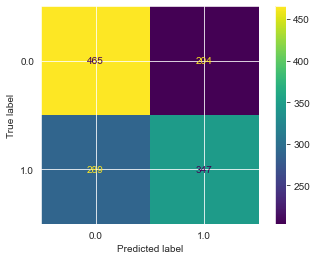

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predicciones
predictions = regresion_logistica.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(regresion_logistica, X_test, y_test)
plt.show()

Observaciones:
- Al modelo le cuesta predecir valores positivos y negativos (los falsos positivos y negativos son altos en comparación con los verdaderos positivos y negativos).

Accuracy of the classifier is: 0.6222222222222222
Precision Score of the classifier is: 0.6297640653357531
Recall Score of the classifier is: 0.5455974842767296
F1 Score of the classifier is: 0.5846672283066554
AUC for our classifier is: 0.666384634909891


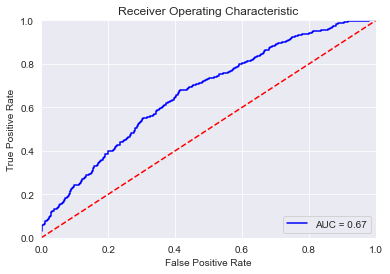

In [32]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = regresion_logistica.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hypertuning

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
# parameter grid
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
    'C'       : [0.0001,0.001,0.01,0.1,1,10,100, 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'class_weight': ['balanced'],
    'random_state': np.arange(1,10000,100),
    'warm_start':[False, True]
}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
regresion_logistica = LogisticRegression()
regresion_logistica = RandomizedSearchCV(regresion_logistica,
                   parameters,  
                   scoring='accuracy',        
                   cv=5, verbose=2, n_iter=100)

In [36]:
regresion_logistica.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=10, class_weight=balanced, penalty=elasticnet, random_state=7301, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=elasticnet, random_state=7301, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=elasticnet, random_state=7301, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=elasticnet, random_state=7301, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=elasticnet, random_state=7301, solver=lbfgs, warm_start=True; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l2, random_state=5801, solver=liblinear, warm_start=True; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l2, random_state=5801, solver=liblinear, warm_start=True; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=l2, ran

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'class_weight': ['balanced'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101,
       2201, 2301, 2401, 2501, 2601, 2701, 2...
       4401, 4501, 4601, 4701, 4801, 4901, 5001, 5101, 5201, 5301, 5401,
       5501, 5601, 5701, 5801, 5901, 6001, 6101, 6201, 6301, 6401, 6501,
       6601, 6701, 6801, 6901, 7001, 7101, 7201, 7301, 7401, 7501, 7601,
       7701, 7801, 7901, 8001, 8101, 8201, 8301, 8401, 8501, 8601, 8701,
       8801, 8901, 9001, 9101, 9201, 9301, 9401, 9501, 9601, 9701, 9801,
       9901]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear'],
                                        'warm_start': [False, True]},
                   scoring='accuracy', verbose=2)

In [37]:
y_train_pred = regresion_logistica.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

y_test_pred = regresion_logistica.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6357963875205255
% de aciertos sobre el set de evaluación es: 0.6444444444444445


[[441 228]
 [236 400]]


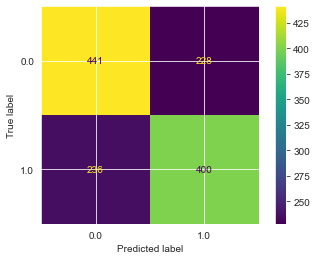

In [38]:
# Predicciones
predictions = regresion_logistica.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(regresion_logistica, X_test, y_test)
plt.show()

Observaciones:
- Se mejoró sustancialmente los valores del recall pero de todas formas el número de falsos negativos y positivos es bajo en relación con los fines de la investigación (64%).

Accuracy of the classifier is: 0.6444444444444445
Precision Score of the classifier is: 0.6369426751592356
Recall Score of the classifier is: 0.6289308176100629
F1 Score of the classifier is: 0.6329113924050632
AUC for our classifier is: 0.7142712769457842


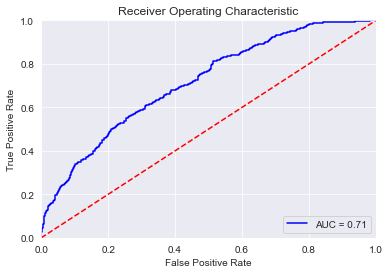

In [39]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = regresion_logistica.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- El modelo predice en un 64% de los casos si el precio de BTC sube o baja.